# CA2 Rory Sheridan


In [13]:
import pandas as pd
import seaborn as sns

# Question 1

Read in the below information of a company’s transactions for the year2022 into a python dictionary files.


In [14]:
class DataFrameManager:
    """Create dataframes from dictionaries and provide manage options."""

    # a. Convert each database into a dataframe in python.
    def __init__(self, *args: dict[str, list]) -> None:
        """Accept dictionaries and store as attributes."""
        for i, db_dict in enumerate(args):
            data_frame = pd.DataFrame(db_dict)
            setattr(self, f'dict_df_{i + 1}', data_frame)

    def add_col(self, frame: object, col: str) -> object:
        """Add a column and generate values for it.

        Args:
            frame (object): the data frame to alter.
            col (str): the column name to add.

        Returns:
            object: The altered frame.

        """
        product_category = {
            'Telephone': 'IT',
            'Monitors': 'IT',
            'Car': 'Transport',
            'Rent': 'Consultancy',
            'Services': 'Consultancy',
            'Training': 'Education',
        }

        to_add = [
            product_category.get(value, '') for value in frame['Product']
        ]

        frame[col] = to_add
        return frame

    # b. Note that the databases and the corresponding column names with
    # spelling differences. Correct this to have all column names without 's'
    def clean_headings(self) -> None:
        """Remove the final s from the dataframe column names."""
        for value in vars(self).values():
            new_columns = [col.removesuffix('s') for col in value.columns]
            value.columns = new_columns

    def clean_number(self, frame: object, num_cols: list[str]) -> None:
        """Check for strings in number column, replace with mean.

        Args:
            frame (object): The data frame to clean.
            num_cols (list[str]): The names of the columns to clean.

        """
        for col in num_cols:
            num_vals = [
                val if isinstance(val, (int, float)) else 0
                for val in frame[col]
            ]
            mean = sum(num_vals) / len(num_vals)
            for i in range(len(num_vals)):
                if num_vals[i] == 0:
                    num_vals[i] = round(mean)
            frame[col] = num_vals

    def delete_col(self, frame: object, col: str) -> object:
        """Delete a column from a frame.

        Args:
            frame (object): The frame to alter.
            col (str): The column to delete.

        Returns:
            _type_: The altered data frame.

        """
        return frame.drop(col, axis=1)

    def join_dataframes(self) -> object:
        """Merge dataframes into a single table based on columns.

        Returns:
            object: Single dataframe.

        """
        try:
            frame_list = list(vars(self).values())
            merged_df = frame_list[0]
            for df in frame_list[1:]:
                matching_cols = [
                    col for col in df.columns if col in merged_df.columns
                ]
                merged_df = merged_df.merge(df, on=matching_cols, how='outer')
        except ValueError as e:
            print(
                'There is an issue with the dataset merging.'
                f' Please check they have shared column: {e}',
            )
        else:
            return merged_df

In [15]:
# Declare data.
dbase1_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Product': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Quantitys': [
        420,
        'Ten',
        234,
        114,
        56,
        13,
    ],
    'Purchase_prices': [
        223,
        344,
        223,
        'Tenn',
        'Two',
        223,
    ],
}
dbase2_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Products': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Sale_price': [
        300,
        435,
        329,
        544,
        'thirty',
        329,
    ],
    'Debit': [
        2,
        2,
        2,
        2,
        2,
        2,
    ],
}

dbase3_dict = {
    'TR_ID': ['C28'],
    'Product': ['Training'],
    'Quantity': [13],
    'Purchase_price': [223],
    'Sale_price': [329],
}

## a. Convert each database into a dataframe in python.


In [16]:
# Accepts dictionaries and stores the data frames as attributes.
dict_df_db = DataFrameManager(dbase1_dict, dbase2_dict, dbase3_dict)

dict_df_db.dict_df_1

,TR_ID,Product,Quantitys,Purchase_prices
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


In [17]:
dict_df_db.dict_df_2

,TR_ID,Products,Sale_price,Debit
0,C23,Telephone,300,2
1,C24,Monitors,435,2
2,C25,Car,329,2
3,C26,Rent,544,2
4,C27,Services,thirty,2
5,C28,Training,329,2


In [18]:
dict_df_db.dict_df_3

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C28,Training,13,223,329


## b. Note that the databases and the corresponding column names with spelling differences. Correct this to have all column names without ‘s’


In [19]:
dict_df_db.clean_headings()
dict_df_db.dict_df_1

,TR_ID,Product,Quantity,Purchase_price
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


## c. Combine the above three databases into one single dataframe called ‘dbase4’ in python using the appropriate method and libraries.


In [20]:
dbase4 = dict_df_db.join_dataframes()
dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,Ten,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,Tenn,544,2
4,C27,Services,56,Two,thirty,2
5,C28,Training,13,223,329,2


## d. Consider the character values as error, remove these errors and replace with column’s mean.


In [21]:
dict_df_db.clean_number(dbase4, ['Quantity', 'Purchase_price', 'Sale_price'])
dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,140,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,169,544,2
4,C27,Services,56,169,323,2
5,C28,Training,13,223,329,2


## e. Delete the variable ‘Debit’ as not needed then add a column called‘Department’ and assign values from product column: Telphone, monitor -> IT, Car -> transport Rent, Services-> Consultancy Training -> Education


In [22]:
dbase5 = dict_df_db.delete_col(dbase4, 'Debit')
dbase5

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C23,Telephone,420,223,300
1,C24,Monitors,140,344,435
2,C25,Car,234,223,329
3,C26,Rent,114,169,544
4,C27,Services,56,169,323
5,C28,Training,13,223,329


In [23]:
dbase6 = dict_df_db.add_col(dbase5, 'Department')
dbase6

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Department
0,C23,Telephone,420,223,300,IT
1,C24,Monitors,140,344,435,IT
2,C25,Car,234,223,329,Transport
3,C26,Rent,114,169,544,Consultancy
4,C27,Services,56,169,323,Consultancy
5,C28,Training,13,223,329,Education


## f. Visualise the data by creating the plot: product by sale and purchase prices on the same plot.

<Axes: xlabel='Purchase_price', ylabel='Sale_price'>

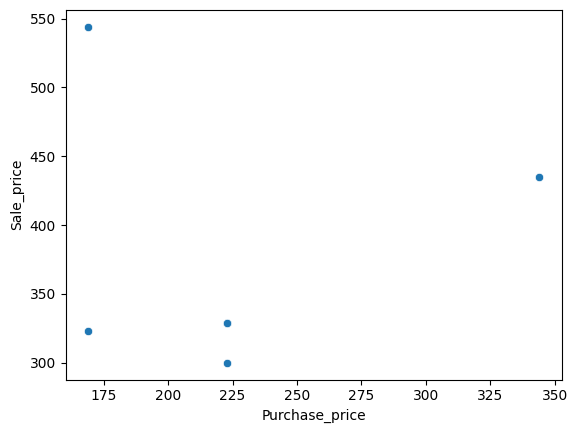

In [25]:
sns.scatterplot(data=dbase6, x='Purchase_price', y='Sale_price')

## g. After creating the single dataframe: Using Object and Class or other method with the above corrected values: Calculate:
Revenue = Quantity*Sale_price
Cost= quantity*purchase_price
Note if revenue > $55000 then a cashback of 5% is given so revenue is less by the 5% amount
If revenue > $35000 and <= $550000 then cashback of %2 is given and revenue less the 2% amount But If revenue <=35000 then cashback of 1% amount is given 
The calculated total cost and total revenue Profit= total revenue – total cost. Report the TR_ID, product name, total revenue , total cost and profit.Check if final profit> 0 then print a message. If final profit = 0 then print a message If final profit < 0 then print a message